In [278]:
import pandas as pd
import numpy as np
from pretrainedModel import *
from faceRecognition import *

In [279]:
# Read all the dataframe with traking info and matched frame's number
all_ = pd.read_pickle("syncPresentation")

In [280]:
all_

seq        secs      nsecs         height       distance    x  \
msgNumber id_                                                                  
0         0    332  1493821804  107249000                                      
1         0    333  1493821804  139261000                                      
2         0    334  1493821804  183389000                                      
3         0    335  1493821804  302242000                                      
4         0    336  1493821804  350142000                                      
5         0    337  1493821804  400331000                                      
6         0    338  1493821804  475117000                                      
7         0    339  1493821804  572505000                                      
8         0    340  1493821804  697255000                                      
9         0    341  1493821804  768324000                                      
10        0    342  1493821804  851435000                                      
11        0    343  1493821804  888131000                                      
12        0    344  1493821805    6445000                                      
13        0    345  1493821805   87776000                                      
14        0    346  1493821805  179494000                                      
15        0    347  1493821805  274866000                                      
16        0    348  1493821805  353865000                                      
17        0    349  1493821805  425019000                                      
18        0    350  1493821805  502453000                                      
19        0    351  1493821805  610822000                                      
20        0    352  1493821805  673517000                                      
21        0    353  1493821805  755815000                                      
22        0    354  1493821805  839606000                                      
23        0    355  1493821805  895149000                                      
24        0    356  1493821805  971624000                                      
25        0    357  1493821806   31740000                                      
26        0    358  1493821806  168679000                                      
27        0    359  1493821806  201594000                                      
28        0    360  1493821806  282441000                                      
29        0    361  1493821806  405202000                                      
...            ...         ...        ...            ...            ...  ...   
372       15   704  1493821833  609360530  1.40438257982  1.12000215054  280   
          16   704  1493821833  609360530  1.56517809317  1.78141963482   54   
          21   704  1493821833  609360530   1.7402808317  2.89329338074  209   
          23   704  1493821833  609360530  1.68606263807  4.12339830399  243   
          24   704  1493821833  609360530  1.73994581591  2.54778671265   16   
          25   704  1493821833  609360530  1.77415892927  2.48415875435  113   
373       15   705  1493821833  675920848  1.39918623563   1.1306681633  288   
          16   705  1493821833  675920848  1.56517809317  1.78141963482   54   
          21   705  1493821833  675920848   1.7402808317  2.89329338074  209   
          23   705  1493821833  675920848  1.68606263807  4.12339830399  243   
          24   705  1493821833  675920848  1.74097407482  2.53706288338   15   
          25   705  1493821833  675920848  1.77615866764  2.47966241837  109   
374       15   706  1493821833  709379418  1.39623068151  1.16185951233  298   
          16   706  1493821833  709379418  1.56517809317  1.78141963482   54   
          21   706  1493821833  709379418   1.7402808317  2.89329338074  209   
          23   706  1493821833  709379418  1.68606263807  4.12339830399  243   
          24   706  1493821833  709379418  1.74173644145  2.51578998566   14   
          25   

In [281]:
# datframe with only one over ten tracking msg (each tracking message can contain 0, one or several tracking info)
ten = all_.iloc[all_.index.get_level_values('msgNumber')%10 == 0]

In [282]:
ten

seq        secs      nsecs         height       distance    x  \
msgNumber id_                                                                  
0         0    332  1493821804  107249000                                      
10        0    342  1493821804  851435000                                      
20        0    352  1493821805  673517000                                      
30        0    362  1493821806  479405000                                      
40        8    372  1493821807  575930018  1.68262721553  3.47965550423  218   
50        8    382  1493821808  342467560  1.69583918815  2.88221144676  172   
60        8    392  1493821809  209261333  1.70081693895  2.25468420982  174   
70        8    402  1493821810  242717427  1.70956765853  1.76871371269  273   
          9    402  1493821810  242717427  1.70693135262  2.66570997238   32   
80        8    412  1493821811   75850523  1.62081884944  1.62065243721  396   
          9    412  1493821811   75850523  1.70543426275  2.62798142433   31   
          10   412  1493821811   75850523  1.70539460123  2.31288194656   24   
          11   412  1493821811   75850523  1.73468800726  2.21153116226   35   
90        8    422  1493821812   42564922  1.62081884944  1.62065243721  396   
          9    422  1493821812   42564922  1.70543426275  2.62798142433   31   
          10   422  1493821812   42564922  1.70341993314  1.75795984268   84   
          11   422  1493821812   42564922  1.73468800726  2.21153116226   35   
          12   422  1493821812   42564922  1.76607929468  2.09585189819   49   
          13   422  1493821812   42564922  1.09132504463  5.35042953491  167   
100       8    432  1493821812  942646487  1.62081884944  1.62065243721  396   
          10   432  1493821812  942646487  1.68059031923  1.82270884514   42   
          11   432  1493821812  942646487  1.73468800726  2.21153116226   35   
          12   432  1493821812  942646487  1.76607929468  2.09585189819   49   
          13   432  1493821812  942646487  1.09132504463  5.35042953491  167   
          14   432  1493821812  942646487  1.11829202175  5.31998491287  164   
110       8    442  1493821813  642722190  1.62081884944  1.62065243721  396   
          10   442  1493821813  642722190  1.71458326862  2.45731139183   69   
          11   442  1493821813  642722190  1.73468800726  2.21153116226   35   
          13   442  1493821813  642722190  1.10979322195  5.27896356583  162   
          14   442  1493821813  642722190  1.13278538704  5.31120920181  162   
...            ...         ...        ...            ...            ...  ...   
330       16   662  1493821830  279051954  1.56517809317  1.78141963482   54   
          19   662  1493821830  279051954  1.72863454871   2.6077208519   46   
          20   662  1493821830  279051954   1.2823349452  5.29251766205   90   
          21   662  1493821830  279051954  1.64641456188  2.05314230919  211   
          23   662  1493821830  279051954  1.68606263807  4.12339830399  243   
          24   662  1493821830  279051954  1.69216186988  3.88246011734  193   
340       15   672  1493821831   42472980  1.70186710606  2.04256248474  100   
          16   672  1493821831   42472980  1.56517809317  1.78141963482   54   
          19   672  1493821831   42472980  1.72863454871   2.6077208519   46   
          21   672  1493821831   42472980  1.70971153541   2.6566927433  199   
          23   672  1493821831   42472980  1.68606263807  4.12339830399  243   
          24   672  1493821831   42472980  1.71501825628  3.61785674095  175   
350       15   682  1493821831  809536964  1.67983411067  1.65166223049  101   
          16   682  1493821831  809536964  1.56517809317  1.78141963482   54   
          19   682  1493821831  809536964  1.72863454871   2.6077208519   46   
          21   682  1493821831  809536964  1.73797800899  2.88639259338  208   
          23   682  1493821831  809536964  1.68606263807  4.12339830399  243   
          24   

In [283]:
frameNumber = ten.frameMatch.unique()

In [284]:
sess, embeddings, images_in, phase_train_in, pnet, rnet, onet = detectionNetwork()

loading the detection/alignment network...
done!
loading the embedding network...
done!


In [293]:
# Path of the references faces that will construct the database of faces
pathsKnown = ["/home/sabrine/Pictures/sabrine2.jpg",
              #"/home/sabrine/Pictures/cynthia.jpg", 
              "/home/sabrine/Pictures/anthony.jpg",
             "/home/sabrine/Pictures/laurene.jpg",
             "/home/sabrine/Pictures/wissem2.jpg"]

# Creation of identities names
names = ['Sabrine', 'Anthony', 'Laurene', 'Wissem']

In [294]:
# detection parameters
minsize = 20 
threshold = [ 0.6, 0.7, 0.7 ]
factor = 0.709

detecting faces...


(10, 1)


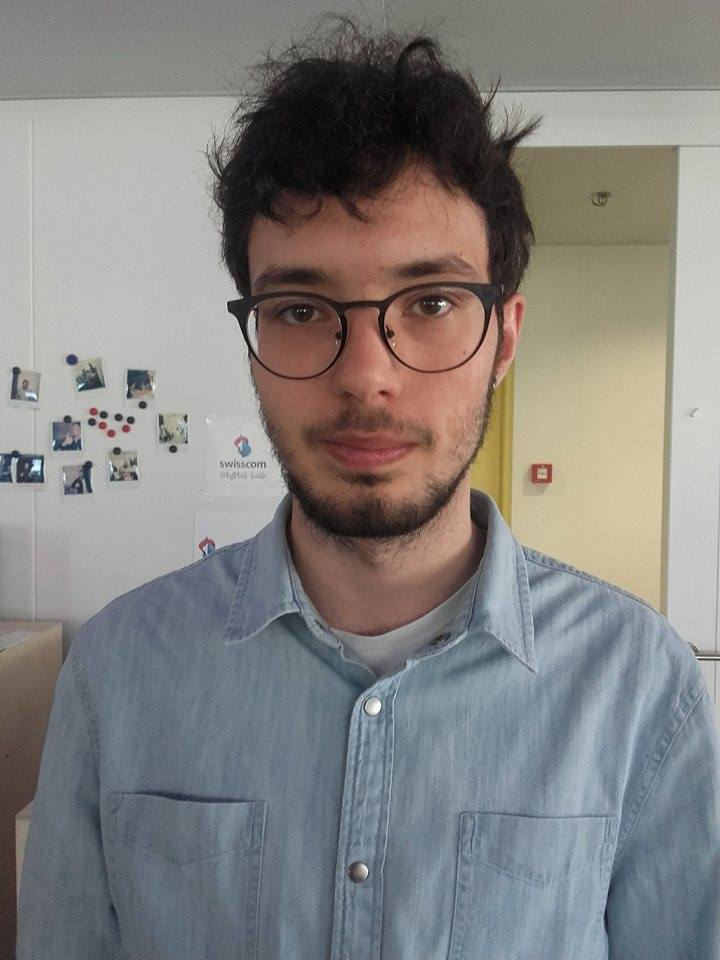

(10, 1)


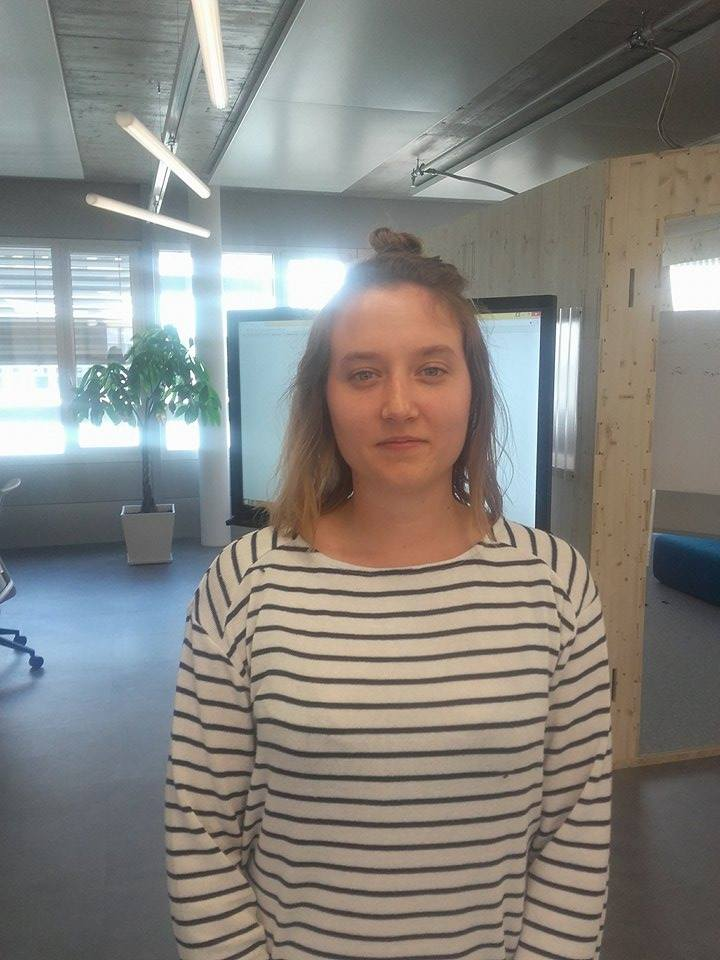

(10, 1)


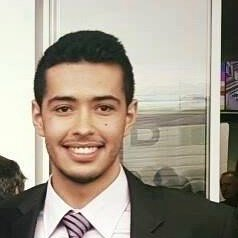

(10, 1)
done!
computing embeddings
done!


In [295]:
knownFaces_embs = embeddingKnownFaces(pathsKnown, names, sess, embeddings, images_in,
                   phase_train_in, pnet, rnet, onet,
                   minsize, threshold, factor)

In [296]:
knownFaces_embs

0         1         2         3         4         5         6    \
Sabrine -0.028806  0.072131 -0.125736 -0.128525  0.075750  0.000068  0.042124   
Anthony  0.008280  0.038681 -0.165792 -0.104440  0.113113  0.081178 -0.212727   
Laurene -0.115616  0.002617 -0.025301  0.033954  0.134795 -0.067169  0.081935   
Wissem   0.015730 -0.079310  0.050962  0.008145 -0.043879  0.017044  0.061217   

              7         8         9      ...          118       119       120  \
Sabrine -0.019027 -0.004448  0.041839    ...    -0.121870 -0.098207  0.089860   
Anthony  0.019114 -0.008581 -0.047362    ...     0.068490 -0.075557 -0.080983   
Laurene  0.027577  0.083592  0.111278    ...    -0.168865  0.078030  0.056819   
Wissem   0.045792 -0.095027 -0.166838    ...    -0.012944 -0.176767 -0.086258   

              121       122       123       124       125       126       127  
Sabrine -0.032175  0.053002 -0.010617 -0.089624 -0.004484  0.003537  0.047470  
Anthony  0.017885 -0.009686 -0.012931  0.071127 -0.101487 -0.081703  0.150088  
Laurene  0.090519 -0.202206  0.041570  0.138569  0.041417  0.096900  0.097921  
Wissem  -0.013031 -0.223327  0.135353  0.042385 -0.199172 -0.060015 -0.082576  

[4 rows x 128 columns]

/home/sabrine/notebook/framesRGB/1493821816878415710.jpg


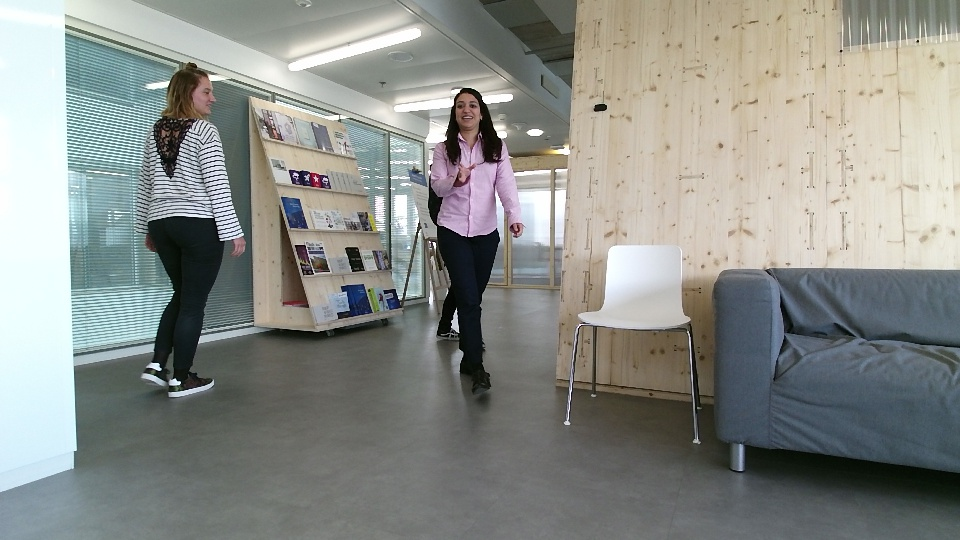

(10, 2)
('temp', [('Sabrine', 1.1956155765219891, [201, 96])])
('temp', [('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])]])
/home/sabrine/notebook/framesRGB/1493821833972028216.jpg


(10, 2)
('temp', [('Anthony', 0.9059444681874721, [342, 33])])
('temp', [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])]])
/home/sabrine/notebook/framesRGB/1493821827698216364.jpg


(10, 1)
('temp', [('Laurene', 1.1152373100424755, [365, 110])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])]])
/home/sabrine/notebook/framesRGB/1493821805484226482.jpg


(0,)
/home/sabrine/notebook/framesRGB/1493821828901167711.jpg


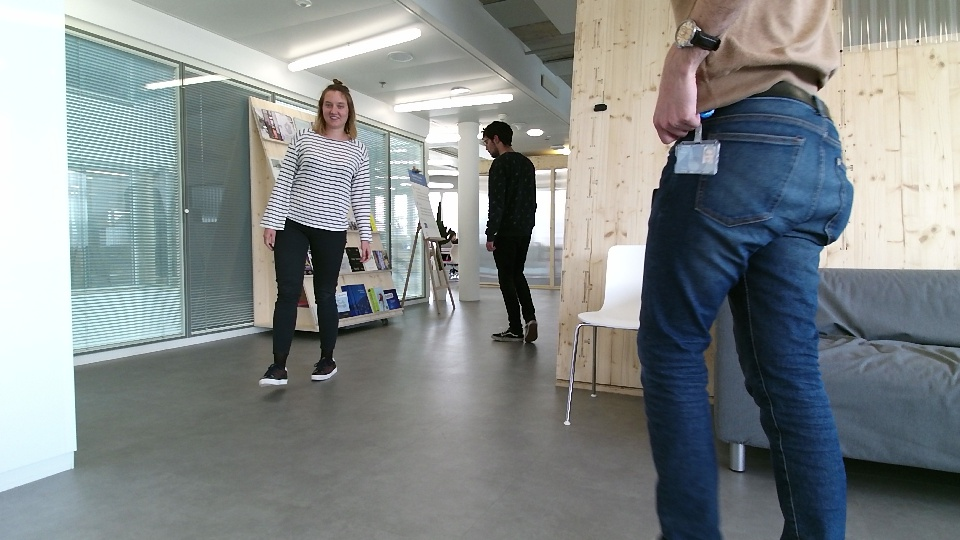

(10, 2)
('temp', [('Laurene', 1.2167998569254688, [334, 108])])
('temp', [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])]])
/home/sabrine/notebook/framesRGB/1493821831352359119.jpg


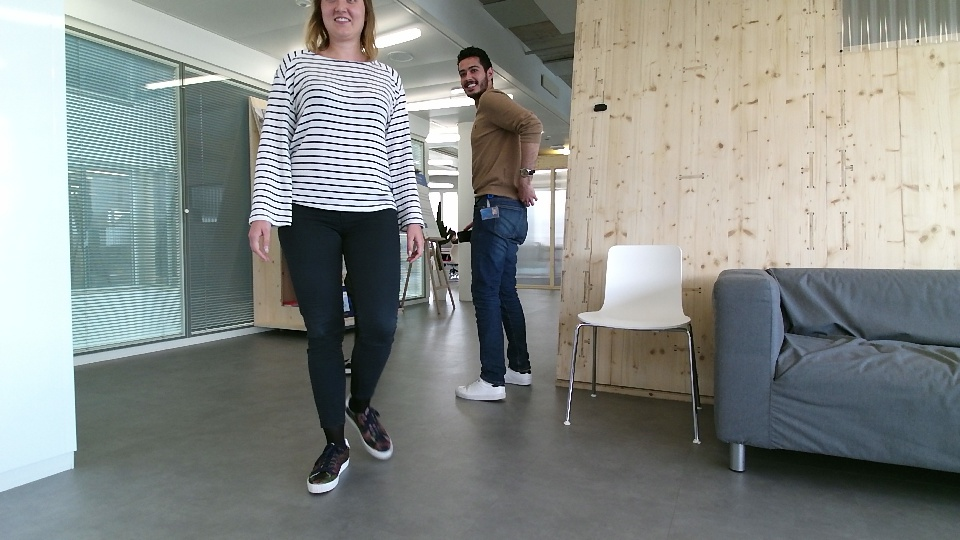

(10, 3)
('temp', [('Wissem', 1.1566856452866803, [471, 77])])
('temp', [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27])])
('temp', [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])]])
/home/sabrine/notebook/framesRGB/1493821817737309018.jpg


(10, 2)
('temp', [('Sabrine', 1.0269711224363451, [526, 68])])
('temp', [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])]])
/home/sabrine/notebook/framesRGB/1493821826897243199.jpg


(10, 0)
/home/sabrine/notebook/framesRGB/1493821811164987330.jpg


(10, 1)
('temp', [('Anthony', 0.87604996747511255, [282, 30])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])]])
/home/sabrine/notebook/framesRGB/1493821821146607993.jpg


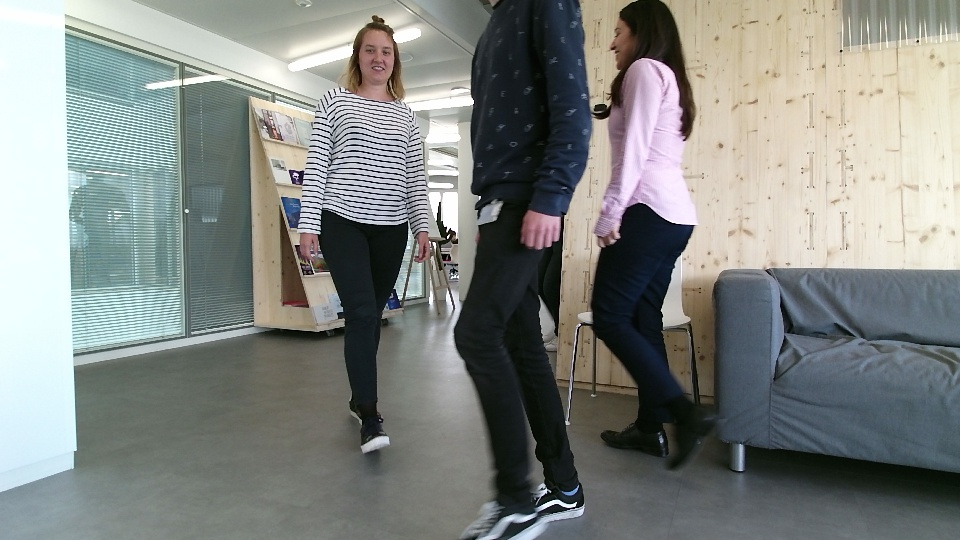

(10, 2)
('temp', [('Laurene', 0.77877981549762154, [376, 56])])
('temp', [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])]])
/home/sabrine/notebook/framesRGB/1493821823811310160.jpg


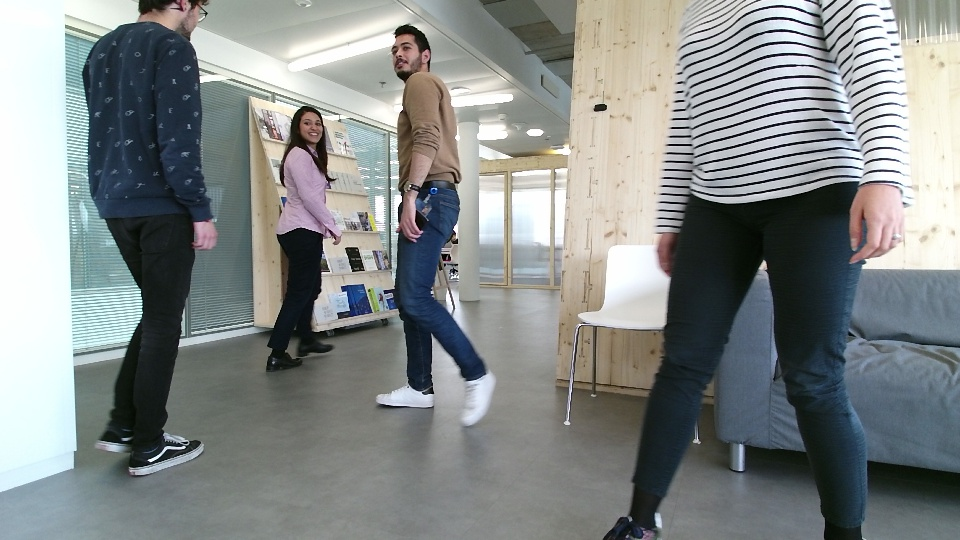

(10, 2)
('temp', [('Wissem', 0.9801111671584597, [406, 55])])
('temp', [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])]])
/home/sabrine/notebook/framesRGB/1493821814009774201.

(10, 0)
/home/sabrine/notebook/framesRGB/1493821824020496738.jpg


(10, 2)
('temp', [('Wissem', 0.97148590183320349, [330, 133])])
('temp', [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), (

(10, 2)
('temp', [('Laurene', 0.73047254380929594, [464, 68])])
('temp', [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 1.0565465372818206, [337, 40])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('

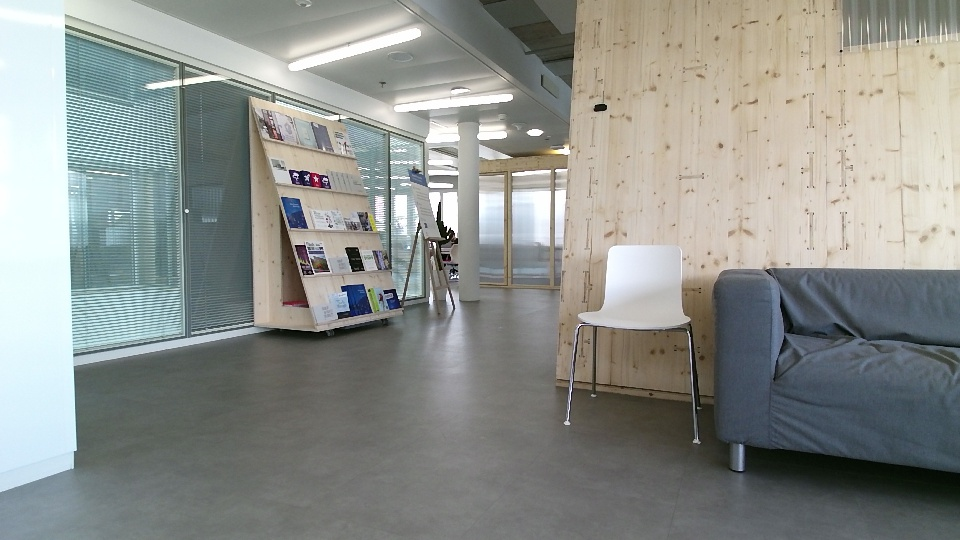

(0,)
/home/sabrine/notebook/framesRGB/1493821811181966529.jpg


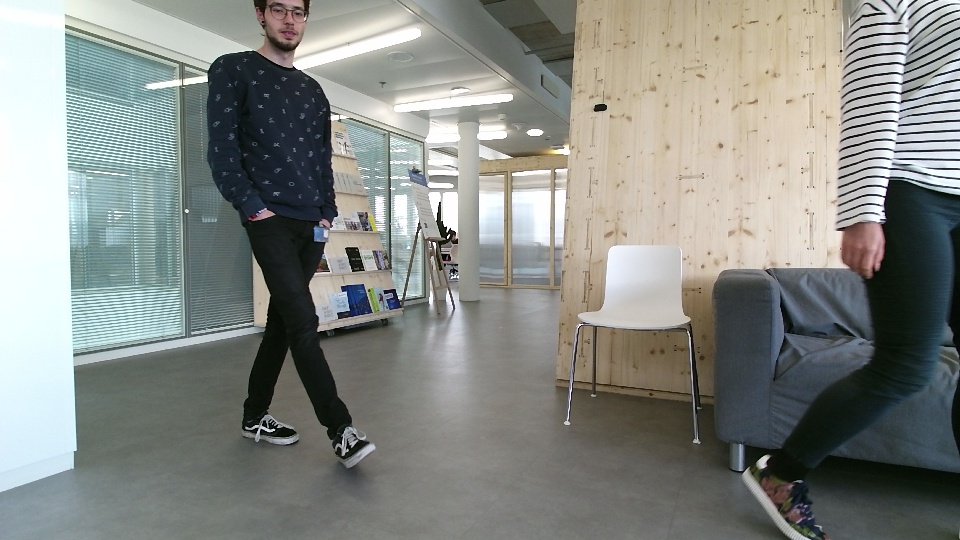

(10, 1)
('temp', [('Anthony', 0.87504427278324115, [286, 30])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem',

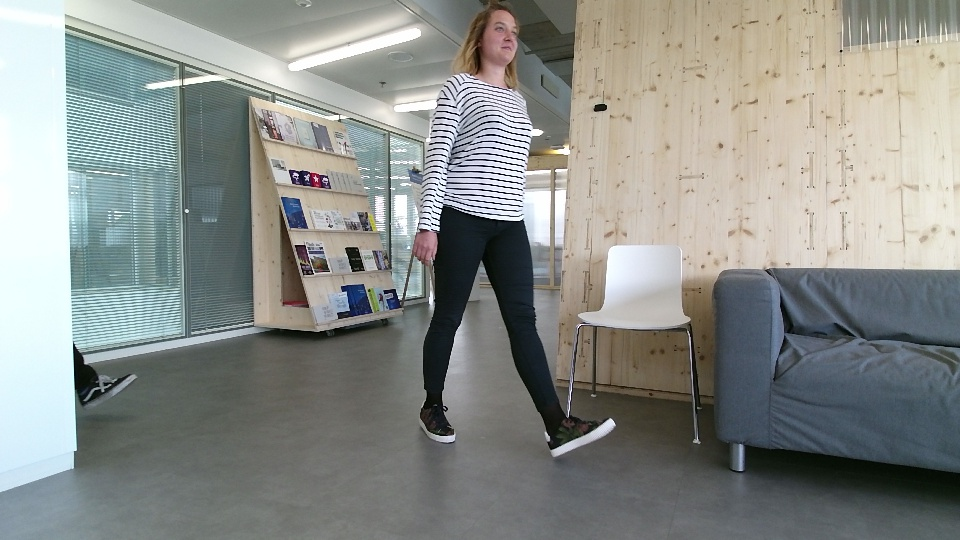

(10, 1)
('temp', [('Laurene', 0.95785755474818512, [500, 38])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem',

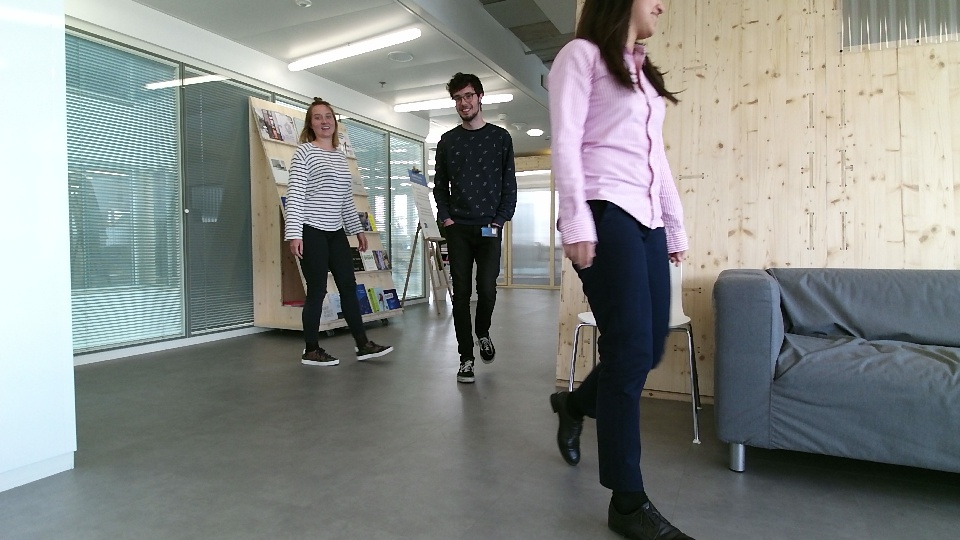

(10, 2)
('temp', [('Sabrine', 1.2377851226463337, [322, 120])])
('temp', [('Sabrine', 1.2377851226463337, [322, 120]), ('Anthony', 1.2408557264044231, [465, 102])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), 

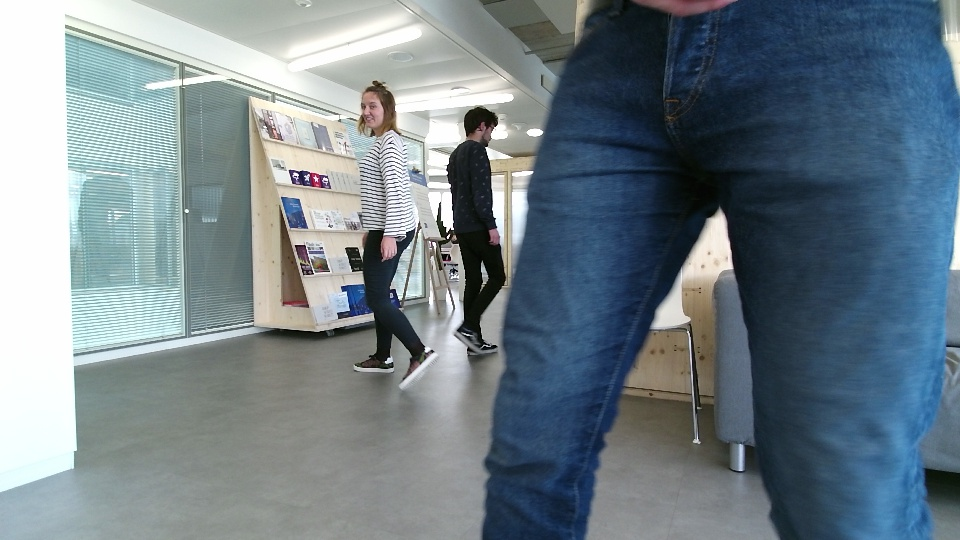

(10, 1)
('temp', [('Laurene', 1.0629417829981223, [372, 111])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem',

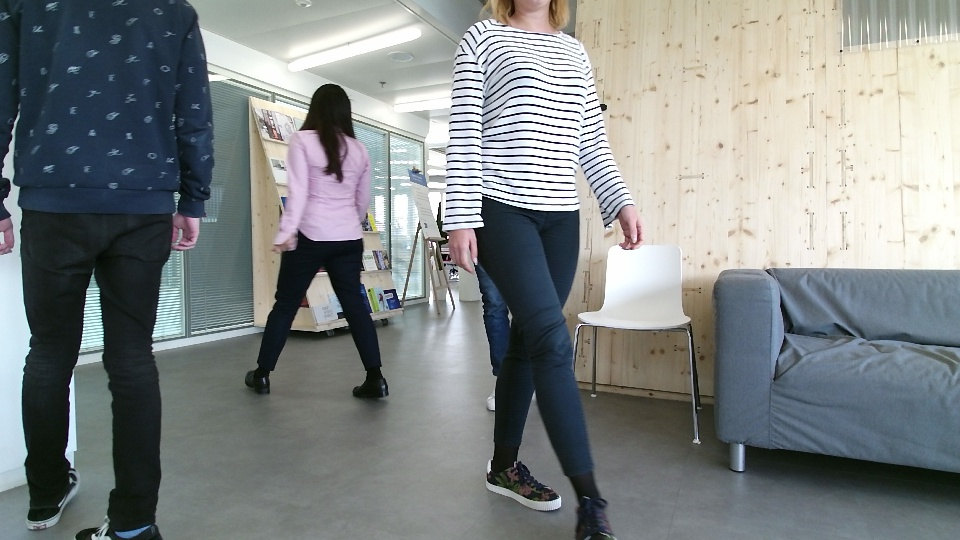

(10, 0)
/home/sabrine/notebook/framesRGB/1493821824147618809.jpg


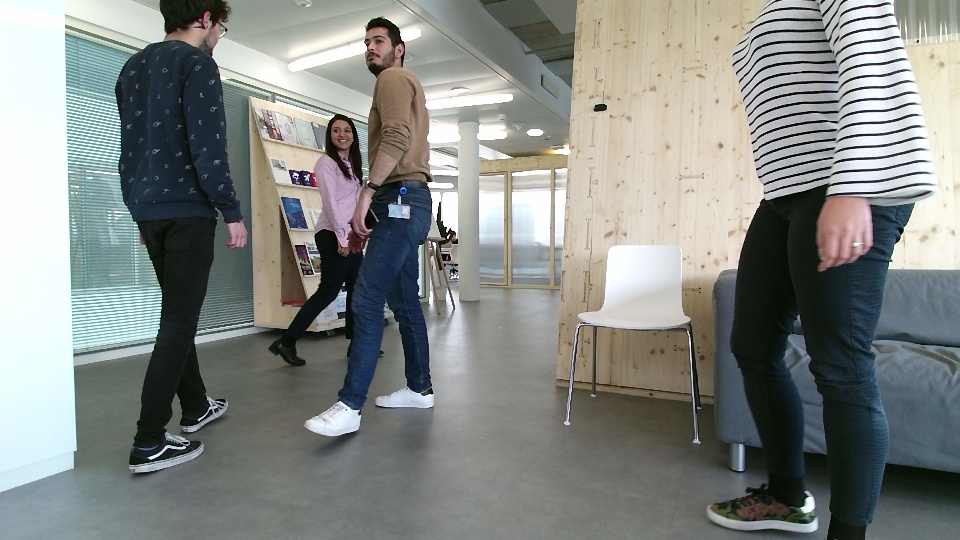

(10, 2)
('temp', [('Wissem', 1.0125108371638478, [378, 47])])
('temp', [('Wissem', 1.0125108371638478, [378, 47]), ('Laurene', 1.326571783683921, [341, 134])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Lau

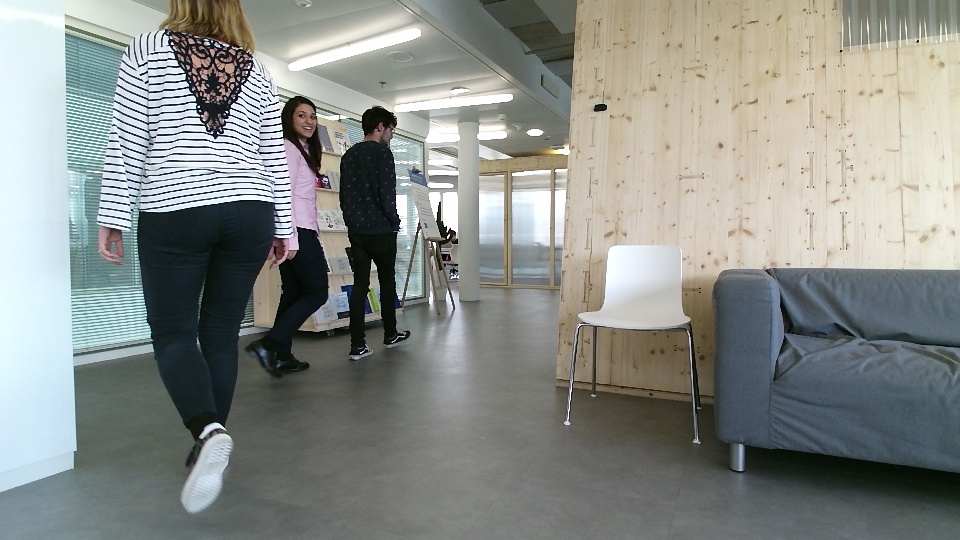

(10, 1)
('temp', [('Wissem', 1.2976798816866744, [304, 119])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 

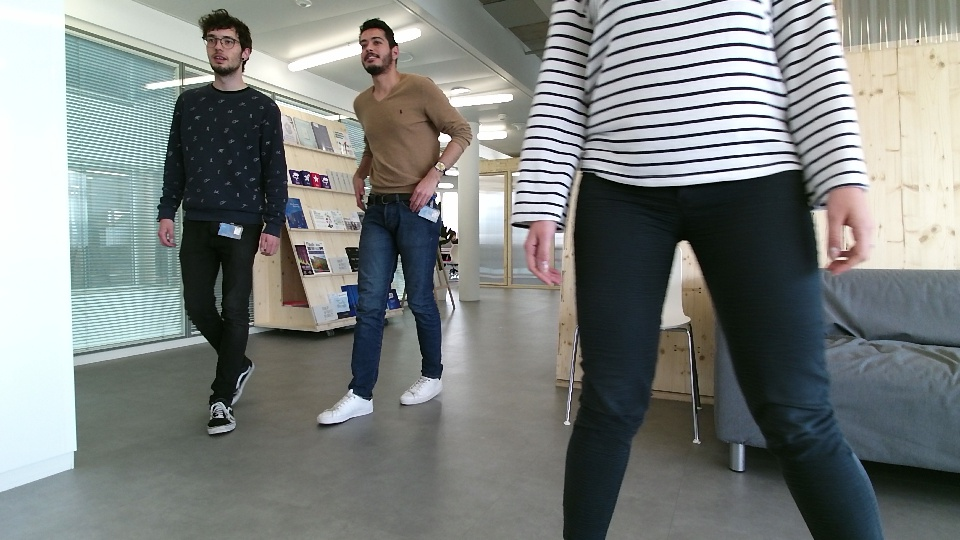

(10, 2)
('temp', [('Anthony', 0.88364364776091364, [374, 48])])
('temp', [('Anthony', 0.88364364776091364, [374, 48]), ('Wissem', 0.88649100862399255, [223, 47])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), (

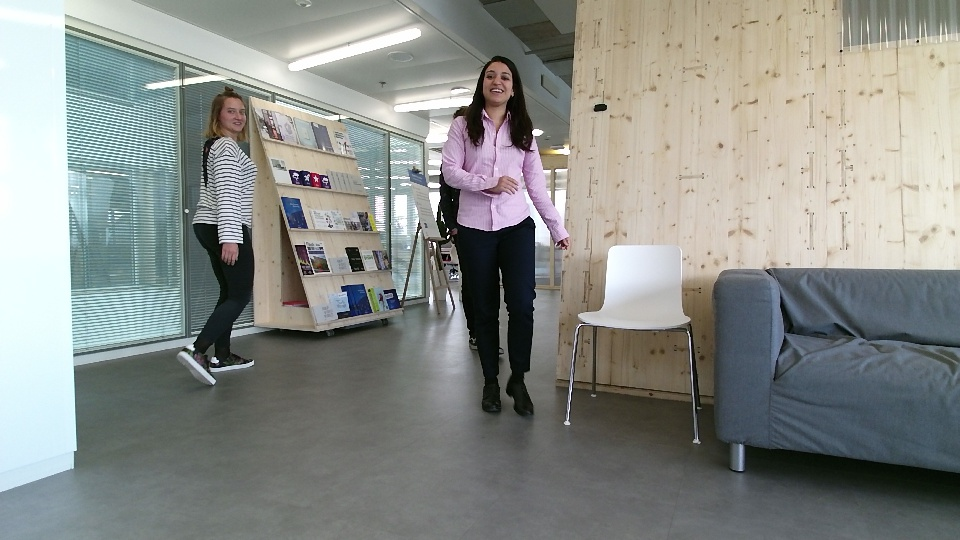

(10, 2)
('temp', [('Laurene', 1.1251757920947114, [497, 82])])
('temp', [('Laurene', 1.1251757920947114, [497, 82]), ('Wissem', 1.2498627016887507, [233, 115])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('L

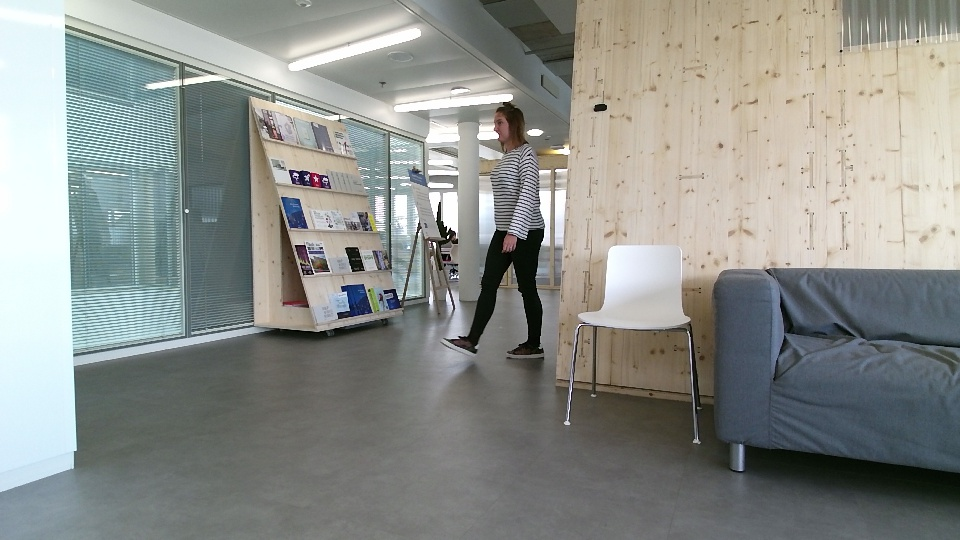

(10, 1)
('temp', [('Wissem', 1.2174803677879276, [501, 127])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 

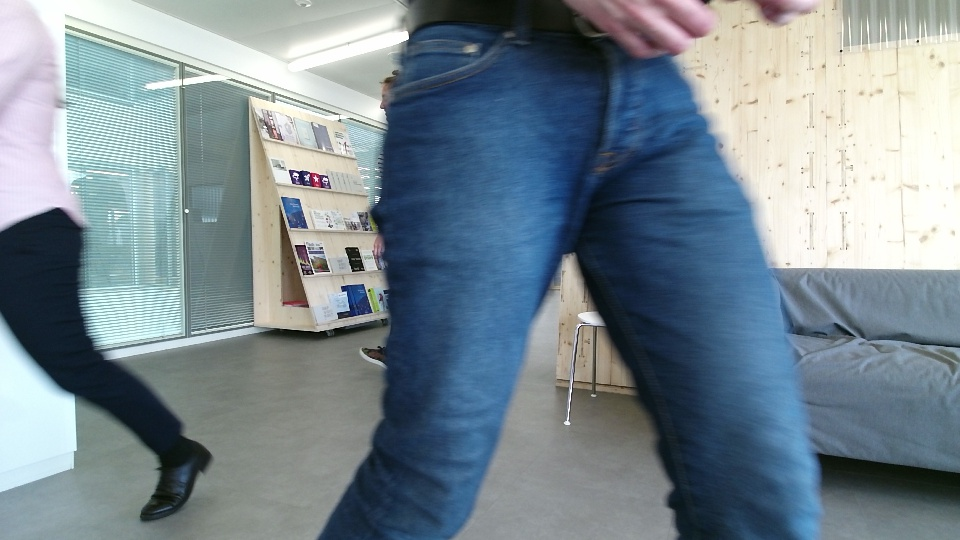

(10, 0)
/home/sabrine/notebook/framesRGB/1493821822338403949.jpg


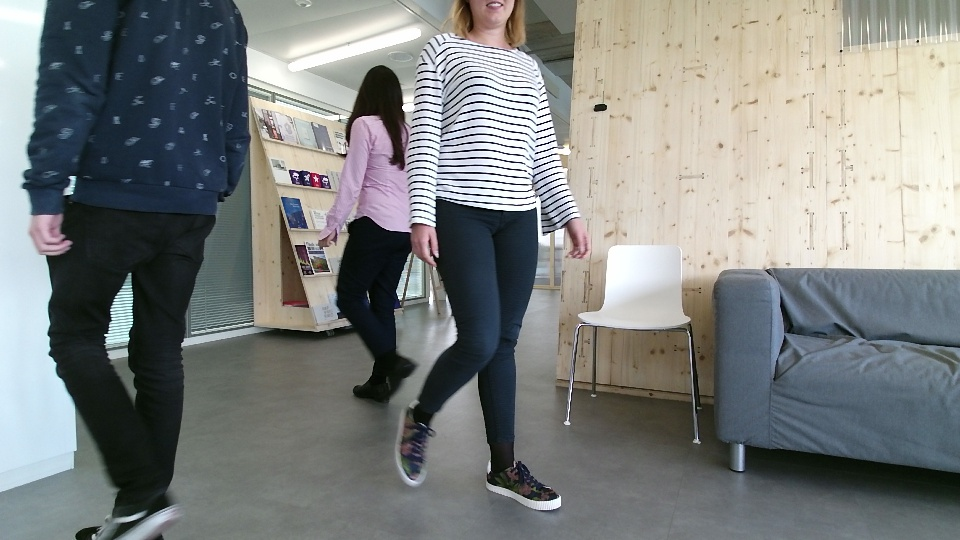

(10, 0)
/home/sabrine/notebook/framesRGB/1493821831415715816.jpg


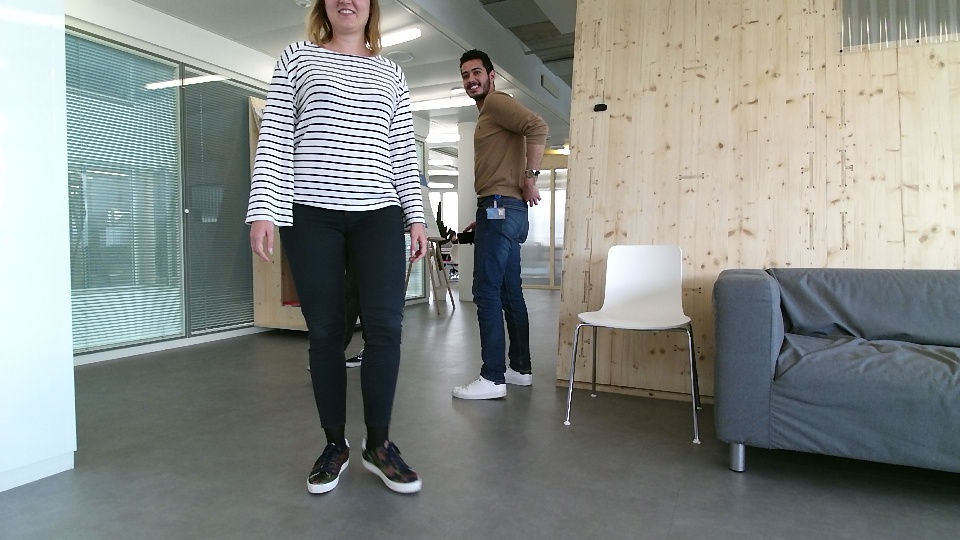

(10, 1)
('temp', [('Sabrine', 1.2242416792972115, [475, 78])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 

(0,)
/home/sabrine/notebook/framesRGB/1493821818980433468.jpg


(10, 2)
('temp', [('Anthony', 0.93049299422782594, [491, 82])])
('temp', [('Anthony', 0.93049299422782594, [491, 82]), ('Sabrine', 1.1992274479295995, [369, 117])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), 

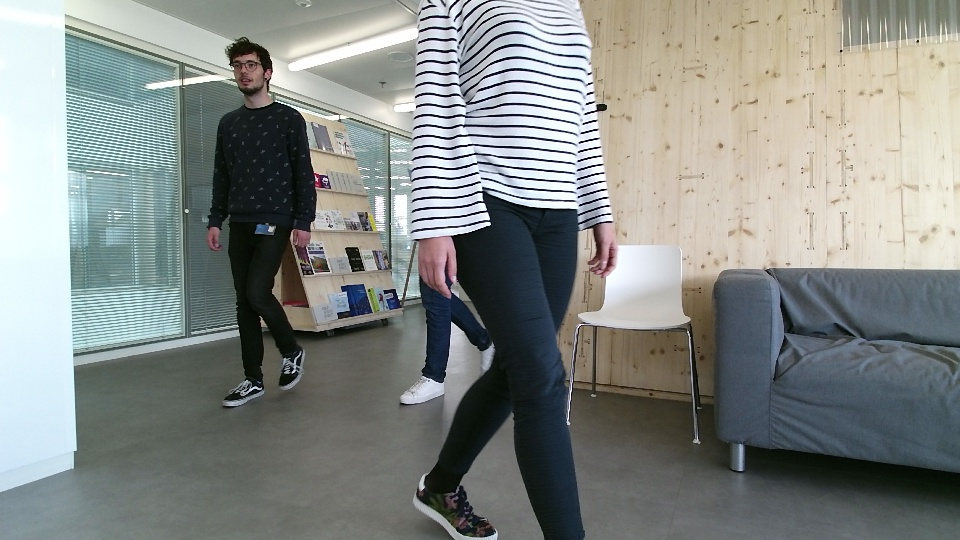

(10, 1)
('temp', [('Anthony', 1.219913904029954, [247, 71])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 1

(10, 0)
/home/sabrine/notebook/framesRGB/1493821814974317559.jpg


(10, 1)
('temp', [('Anthony', 1.2843779820081238, [238, 42])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 

(10, 1)
('temp', [('Wissem', 1.2307234063384018, [299, 120])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem', 

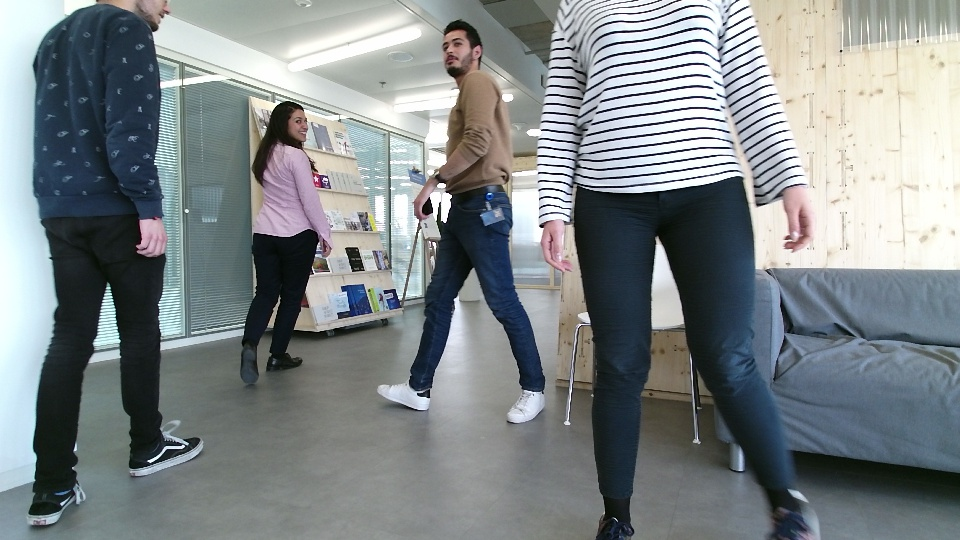

(10, 2)
('temp', [('Wissem', 0.99713212205960822, [298, 124])])
('temp', [('Wissem', 0.99713212205960822, [298, 124]), ('Laurene', 1.2563694847736633, [456, 50])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), (

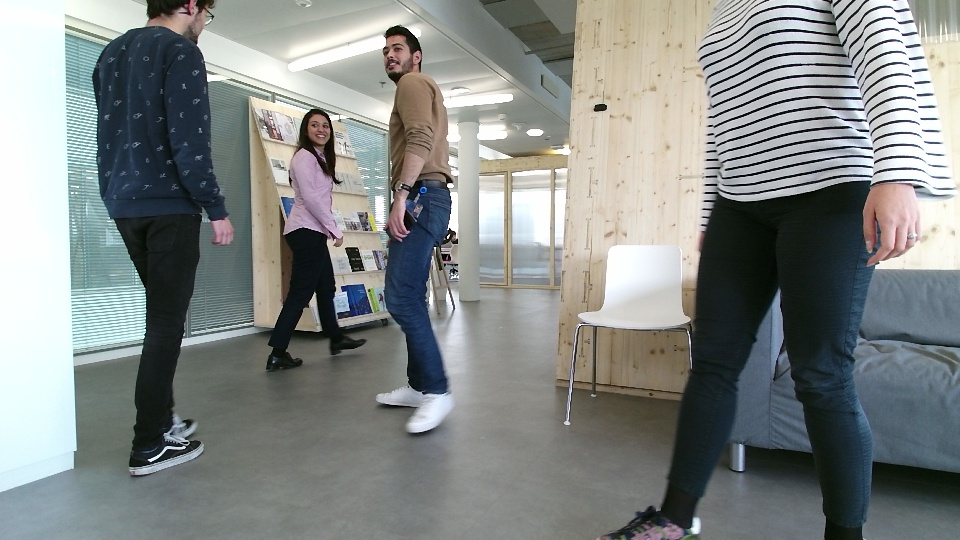

(10, 2)
('temp', [('Wissem', 0.9016169143156324, [397, 54])])
('temp', [('Wissem', 0.9016169143156324, [397, 54]), ('Sabrine', 1.2954482796441231, [318, 129])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('La

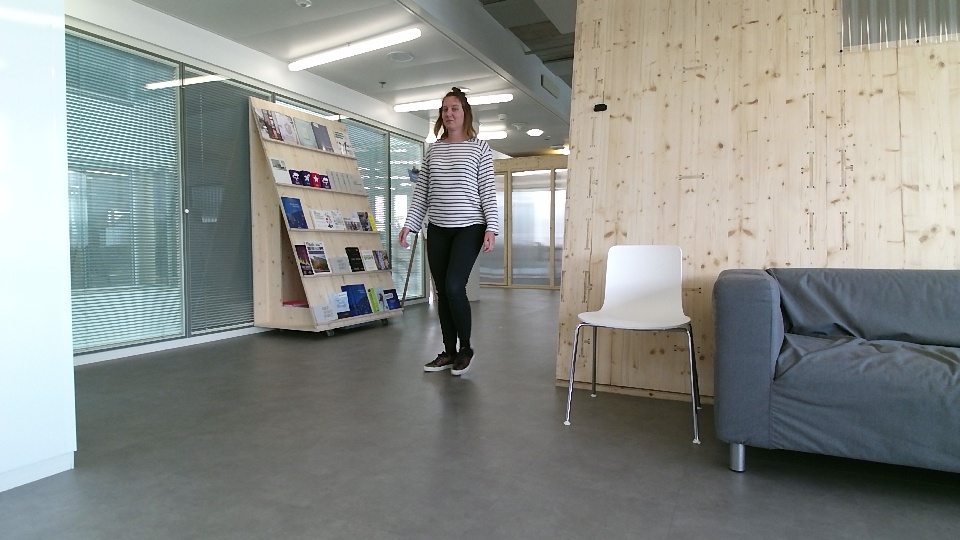

(10, 1)
('temp', [('Sabrine', 1.2216199383211754, [452, 112])])
('fr', [[('Sabrine', 1.1956155765219891, [201, 96]), ('Wissem', 1.2207389482861941, [467, 110])], [('Anthony', 0.9059444681874721, [342, 33]), ('Wissem', 1.0821552465001789, [189, 31])], [('Laurene', 1.1152373100424755, [365, 110])], [], [('Laurene', 1.2167998569254688, [334, 108]), ('Wissem', 1.2687911265236289, [489, 144])], [('Wissem', 1.1566856452866803, [471, 77]), ('Laurene', 1.2727095634682251, [342, 27]), ('Sabrine', 1.3020190010586734, [338, 462])], [('Sabrine', 1.0269711224363451, [526, 68]), ('Laurene', 1.2471421738330128, [254, 119])], [], [('Anthony', 0.87604996747511255, [282, 30])], [('Laurene', 0.77877981549762154, [376, 56]), ('Wissem', 1.2257555521387034, [623, 40])], [('Wissem', 0.9801111671584597, [406, 55]), ('Laurene', 1.2919695541530991, [310, 126])], [], [('Wissem', 0.97148590183320349, [330, 133]), ('Laurene', 1.3398010708537926, [389, 51])], [('Laurene', 0.73047254380929594, [464, 68]), ('Wissem',

(0,)


In [297]:
fr = []
for nb in frameNumber:
    pathUnknown = "/home/sabrine/notebook/framesRGB/" + str(nb) + ".jpg"
    print(pathUnknown)
    
    unknownFaces_embs, centerCoordinates = embeddingUnknownFaces(pathUnknown,sess, embeddings, images_in, phase_train_in, 
                                                                 pnet, rnet, onet, minsize, threshold, factor)
    

    if len(unknownFaces_embs) != 0:
        dist = distance.cdist(np.vstack(unknownFaces_embs),
                          pd.DataFrame.as_matrix(knownFaces_embs))

        distest = dist.copy()

        temp =[]
        i = 0
        while dist.min() != np.inf:     
            where = np.where(dist == dist.min())
            
            #print("name", names[int(where[1])])
            #temp.append(names[int(where[1])])
            #print("distance", dist[int(where[0]), int(where[1])])
            #temp.append(dist[int(where[0]), int(where[1])])
            #print(centerCoordinates[i])
            #temp.append(centerCoordinates[i])
            
            temp.append((names[int(where[1])],
                   dist[int(where[0]), int(where[1])],
                   centerCoordinates[i]))
            
            dist[int(where[0]), :] = np.inf
            dist[:, int(where[1])] = np.inf
            i = i + 1
            
            print('temp', temp)
        fr.append(temp)
        print('fr', fr)
    
    else:
        fr.append([])

In [298]:
fr

[[('Sabrine', 1.1956155765219891, [201, 96]),
  ('Wissem', 1.2207389482861941, [467, 110])],
 [('Anthony', 0.9059444681874721, [342, 33]),
  ('Wissem', 1.0821552465001789, [189, 31])],
 [('Laurene', 1.1152373100424755, [365, 110])],
 [],
 [('Laurene', 1.2167998569254688, [334, 108]),
  ('Wissem', 1.2687911265236289, [489, 144])],
 [('Wissem', 1.1566856452866803, [471, 77]),
  ('Laurene', 1.2727095634682251, [342, 27]),
  ('Sabrine', 1.3020190010586734, [338, 462])],
 [('Sabrine', 1.0269711224363451, [526, 68]),
  ('Laurene', 1.2471421738330128, [254, 119])],
 [],
 [('Anthony', 0.87604996747511255, [282, 30])],
 [('Laurene', 0.77877981549762154, [376, 56]),
  ('Wissem', 1.2257555521387034, [623, 40])],
 [('Wissem', 0.9801111671584597, [406, 55]),
  ('Laurene', 1.2919695541530991, [310, 126])],
 [],
 [('Wissem', 0.97148590183320349, [330, 133]),
  ('Laurene', 1.3398010708537926, [389, 51])],
 [('Laurene', 0.73047254380929594, [464, 68]),
  ('Wissem', 1.0565465372818206, [337, 40])],
 [],

In [299]:
len(fr)

38

In [300]:
len(ten)

190

In [301]:
d = {'frameMatch': frameNumber, 'fr': fr}
df = pd.DataFrame(data=d)

In [302]:
df.head()

fr           frameMatch
0  [(Sabrine, 1.19561557652, [201, 96]), (Wissem,...  1493821816878415710
1  [(Anthony, 0.905944468187, [342, 33]), (Wissem...  1493821833972028216
2             [(Laurene, 1.11523731004, [365, 110])]  1493821827698216364
3                                                 []  1493821805484226482
4  [(Laurene, 1.21679985693, [334, 108]), (Wissem...  1493821828901167711

In [303]:
df.set_index(frameNumber)

fr  \
1493821816878415710  [(Sabrine, 1.19561557652, [201, 96]), (Wissem,...   
1493821833972028216  [(Anthony, 0.905944468187, [342, 33]), (Wissem...   
1493821827698216364             [(Laurene, 1.11523731004, [365, 110])]   
1493821805484226482                                                 []   
1493821828901167711  [(Laurene, 1.21679985693, [334, 108]), (Wissem...   
1493821831352359119  [(Wissem, 1.15668564529, [471, 77]), (Laurene,...   
1493821817737309018  [(Sabrine, 1.02697112244, [526, 68]), (Laurene...   
1493821826897243199                                                 []   
1493821811164987330             [(Anthony, 0.876049967475, [282, 30])]   
1493821821146607993  [(Laurene, 0.778779815498, [376, 56]), (Wissem...   
1493821823811310160  [(Wissem, 0.980111167158, [406, 55]), (Laurene...   
1493821814009774201                                                 []   
1493821824020496738  [(Wissem, 0.971485901833, [330, 133]), (Lauren...   
1493821830968103989  [(Laurene, 0.730472543809, [464, 68]), (Wissem...   
1493821805155111969                                                 []   
1493821811181966529             [(Anthony, 0.875044272783, [286, 30])]   
1493821809446700952             [(Laurene, 0.957857554748, [500, 38])]   
1493821818477264654  [(Sabrine, 1.23778512265, [322, 120]), (Anthon...   
1493821827607957537               [(Laurene, 1.062941783, [372, 111])]   
1493821822699663802                                                 []   
1493821824147618809  [(Wissem, 1.01251083716, [378, 47]), (Laurene,...   
1493821815274266350              [(Wissem, 1.29767988169, [304, 119])]   
1493821833354428474  [(Anthony, 0.883643647761, [374, 48]), (Wissem...   
1493821817381763575  [(Laurene, 1.12517579209, [497, 82]), (Wissem,...   
1493821807163165232              [(Wissem, 1.21748036779, [501, 127])]   
1493821827275404606                                                 []   
1493821822338403949                                                 []   
1493821831415715816               [(Sabrine, 1.2242416793, [475, 78])]   
1493821804741962699                                                 []   
1493821818980433468  [(Anthony, 0.930492994228, [491, 82]), (Sabrin...   
1493821832591263537              [(Anthony, 1.21991390403, [247, 71])]   
1493821813789561562                                                 []   
1493821814974317559              [(Anthony, 1.28437798201, [238, 42])]   
1493821815170465617              [(Wissem, 1.23072340634, [299, 120])]   
1493821823506642361  [(Wissem, 0.99713212206, [298, 124]), (Laurene...   
1493821823876045691  [(Wissem, 0.901616914316, [397, 54]), (Sabrine...   
1493821807803594225             [(Sabrine, 1.22161993832, [452, 112])]   
1493821827234316642                                                 []   

                              frameMatch  
1493821816878415710  1493821816878415710  
1493821833972028216  1493821833972028216  
1493821827698216364  1493821827698216364  
1493821805484226482  1493821805484226482  
1493821828901167711  1493821828901167711  
1493821831352359119  1493821831352359119  
1493821817737309018  1493821817737309018  
1493821826897243199  1493821826897243199  
1493821811164987330  1493821811164987330  
1493821821146607993  1493821821146607993  
1493821823811310160  1493821823811310160  
1493821814009774201  1493821814009774201  
1493821824020496738  1493821824020496738  
1493821830968103989  1493821830968103989  
1493821805155111969  1493821805155111969  
1493821811181966529  1493821811181966529  
1493821809446700952  1493821809446700952  
1493821818477264654  1493821818477264654  
1493821827607957537  1493821827607957537  
1493821822699663802  1493821822699663802  
1493821824147618809  1493821824147618809  
1493821815274266350  1493821815274266350  
1493821833354428474  1493821833354428474  
1493821817381763575  1493821817381763575  
1493821807163165232  1493821807163165232  
1493821827275404606  1493821827275404606  
1493821822338403949 

In [304]:
ten.frameMatch

msgNumber  id_
0          0      1493821816878415710
10         0      1493821833972028216
20         0      1493821827698216364
30         0      1493821805484226482
40         8      1493821828901167711
50         8      1493821831352359119
60         8      1493821817737309018
70         8      1493821826897243199
           9      1493821826897243199
80         8      1493821811164987330
           9      1493821811164987330
           10     1493821811164987330
           11     1493821811164987330
90         8      1493821821146607993
           9      1493821821146607993
           10     1493821821146607993
           11     1493821821146607993
           12     1493821821146607993
           13     1493821821146607993
100        8      1493821823811310160
           10     1493821823811310160
           11     1493821823811310160
           12     1493821823811310160
           13     1493821823811310160
           14     1493821823811310160
110        8      14938218140097742

In [305]:
all2 = all_.copy()

In [306]:
all2.index.get_level_values('id_')

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            21, 23, 24, 25, 15, 16, 21, 23, 24, 25],
           dtype='int64', name=u'id_', length=1901)

In [307]:
all2['ids'] = all2.index.get_level_values('id_')

In [308]:
final = pd.merge(all2, df, on='frameMatch', how='outer')

In [309]:
final = final.set_index(['frameMatch', 'ids'])

In [310]:
final.iloc('1493821828901167711')

In [311]:
final.to_pickle("final")

In [312]:
final

seq        secs      nsecs         height  \
frameMatch          ids                                              
1493821816878415710 0    332  1493821804  107249000                  
1493821805257795741 0    333  1493821804  139261000                  
1493821810424532874 0    334  1493821804  183389000                  
1493821811552327040 0    335  1493821804  302242000                  
1493821812084325946 0    336  1493821804  350142000                  
1493821812209125172 0    337  1493821804  400331000                  
1493821808385691807 0    338  1493821804  475117000                  
1493821817044022592 0    339  1493821804  572505000                  
1493821821407949240 0    340  1493821804  697255000                  
1493821817872742480 0    341  1493821804  768324000                  
1493821833972028216 0    342  1493821804  851435000                  
1493821808672171538 0    343  1493821804  888131000                  
1493821815990399998 0    344  1493821805    6445000                  
1493821827002834087 0    345  1493821805   87776000                  
1493821811825803674 0    346  1493821805  179494000                  
1493821821617889037 0    347  1493821805  274866000                  
1493821805419897349 0    348  1493821805  353865000                  
1493821811441986914 0    349  1493821805  425019000                  
1493821814248442696 0    350  1493821805  502453000                  
1493821817220224164 0    351  1493821805  610822000                  
1493821827698216364 0    352  1493821805  673517000                  
1493821833220029025 0    353  1493821805  755815000                  
1493821812532802688 0    354  1493821805  839606000                  
1493821810284059631 0    355  1493821805  895149000                  
1493821819601811471 0    356  1493821805  971624000                  
1493821810667021163 0    357  1493821806   31740000                  
1493821833035933580 0    358  1493821806  168679000                  
1493821815946236287 0    359  1493821806  201594000                  
1493821824548803771 0    360  1493821806  282441000                  
1493821822276123411 0    361  1493821806  405202000                  
...                      ...         ...        ...            ...   
1493821818355201233 15   704  1493821833  609360530  1.40438257982   
                    16   704  1493821833  609360530  1.56517809317   
                    21   704  1493821833  609360530   1.7402808317   
                    23   704  1493821833  609360530  1.68606263807   
                    24   704  1493821833  609360530  1.73994581591   
                    25   704  1493821833  609360530  1.77415892927   
1493821812313276827 15   705  1493821833  675920848  1.39918623563   
                    16   705  1493821833  675920848  1.56517809317   
                    21   705  1493821833  675920848   1.7402808317   
                    23   705  1493821833  675920848  1.68606263807   
                    24   705  1493821833  675920848  1.74097407482   
                    25   705  1493821833  675920848  1.77615866764   
1493821831110832700 15   706  1493821833  709379418  1.39623068151   
                    16   706  1493821833  709379418  1.56517809317   
                    21   706  1493821833  709379418   1.7402808317   
                    23   706  1493821833  709379418  1.68606263807   
                    24   706  1493821833  709379418  1.74173644145   
                    25   706  1493821833  709379418  1.77879276606   
1493821826749789929 15   707  1493821833  809499345  1.39271540383   
                    16   707  1493821833  809499345  1.56517809317   
                    21   707  1493821833  809499345   1.7402808317   
                    23   707  1493821833  809499345  1.68606263807   
                    24   707  1493821833  809499345  1.74125767016   
                    25   707  1493821833  809499345   1.7798353678   
1493821810768052250 15   708  14938

In [313]:
final2 = final.iloc[final.index.get_level_values('ids') != 0]

In [314]:
final2

seq        secs      nsecs         height  \
frameMatch          ids                                              
1493821832073118828 6    364  1493821806  819901916   1.6660310655   
                    8    364  1493821806  819901916  1.67222416401   
1493821833250998021 8    365  1493821806  909187819  1.67361245155   
1493821820049440533 8    366  1493821806  942803355   1.6749573493   
1493821807576143328 8    367  1493821807   42423908  1.67565658784   
1493821827060603241 8    368  1493821807  143261981  1.67907834437   
1493821825832654045 8    369  1493821807  275942918  1.68060695278   
1493821814794686317 8    370  1493821807  309183767  1.68200567199   
1493821825744681030 8    371  1493821807  442472132  1.68290172964   
1493821828901167711 8    372  1493821807  575930018  1.68262721553   
1493821809954834171 8    373  1493821807  642475943  1.68570267071   
1493821807937588827 8    374  1493821807  709141315  1.68544974544   
1493821823965590237 8    375  1493821807  775902093   1.6890659924   
1493821819388571163 8    376  1493821807  909160546   1.6905186232   
1493821809183256835 8    377  1493821807  975843355   1.6929087689   
1493821830313090873 8    378  1493821808    9078805  1.69266964648   
1493821830622552402 8    379  1493821808  142628883  1.69215346862   
1493821821468237305 8    380  1493821808  242410823  1.69020987888   
1493821817573981271 8    381  1493821808  309091389  1.69196989542   
1493821831352359119 8    382  1493821808  342467560  1.69583918815   
1493821812883978326 8    383  1493821808  475878201  1.69802215843   
1493821812817928943 8    384  1493821808  543920451  1.69820976688   
1493821833557929274 8    385  1493821808  714297870  1.70040157229   
1493821825545748400 8    386  1493821808  775744449   1.7023539435   
1493821828806023551 8    387  1493821808  809090729  1.70187101583   
1493821809614537253 8    388  1493821808  912026937   1.7014408632   
1493821810088111104 8    389  1493821808  975858684   1.7001979581   
1493821808840438553 8    390  1493821809   75800802  1.69966604395   
1493821807195022744 8    391  1493821809  110883493  1.69888624623   
1493821817737309018 8    392  1493821809  209261333  1.70081693895   
...                      ...         ...        ...            ...   
1493821818355201233 15   704  1493821833  609360530  1.40438257982   
                    16   704  1493821833  609360530  1.56517809317   
                    21   704  1493821833  609360530   1.7402808317   
                    23   704  1493821833  609360530  1.68606263807   
                    24   704  1493821833  609360530  1.73994581591   
                    25   704  1493821833  609360530  1.77415892927   
1493821812313276827 15   705  1493821833  675920848  1.39918623563   
                    16   705  1493821833  675920848  1.56517809317   
                    21   705  1493821833  675920848   1.7402808317   
                    23   705  1493821833  675920848  1.68606263807   
                    24   705  1493821833  675920848  1.74097407482   
                    25   705  1493821833  675920848  1.77615866764   
1493821831110832700 15   706  1493821833  709379418  1.39623068151   
                    16   706  1493821833  709379418  1.56517809317   
                    21   706  1493821833  709379418   1.7402808317   
                    23   706  1493821833  709379418  1.68606263807   
                    24   706  1493821833  709379418  1.74173644145   
                    25   706  1493821833  709379418  1.77879276606   
1493821826749789929 15   707  1493821833  809499345  1.39271540383   
                    16   707  1493821833  809499345  1.56517809317   
                    21   707  1493821833  809499345   1.7402808317   
                    23   707  1493821833  809499345  1.68606263807   
                    24   707  1493821833  809499345  1.74125767016   
                    25   707  1493821833  809499345   1.7798353678   
1493821810768052250 15   708  14938

In [315]:
final2.fr

frameMatch           ids
1493821832073118828  6                                                    NaN
                     8                                                    NaN
1493821833250998021  8                                                    NaN
1493821820049440533  8                                                    NaN
1493821807576143328  8                                                    NaN
1493821827060603241  8                                                    NaN
1493821825832654045  8                                                    NaN
1493821814794686317  8                                                    NaN
1493821825744681030  8                                                    NaN
1493821828901167711  8      [(Laurene, 1.21679985693, [334, 108]), (Wissem...
1493821809954834171  8                                                    NaN
1493821807937588827  8                                                    NaN
1493821823965590237  8                 

In [316]:
final3 = final2.dropna()
final3['index1'] = final3.index.get_level_values('ids')

/home/sabrine/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [317]:
final3

seq        secs      nsecs         height  \
frameMatch          ids                                              
1493821828901167711 8    372  1493821807  575930018  1.68262721553   
1493821831352359119 8    382  1493821808  342467560  1.69583918815   
1493821817737309018 8    392  1493821809  209261333  1.70081693895   
1493821826897243199 8    402  1493821810  242717427  1.70956765853   
                    9    402  1493821810  242717427  1.70693135262   
1493821811164987330 8    412  1493821811   75850523  1.62081884944   
                    9    412  1493821811   75850523  1.70543426275   
                    10   412  1493821811   75850523  1.70539460123   
                    11   412  1493821811   75850523  1.73468800726   
1493821821146607993 8    422  1493821812   42564922  1.62081884944   
                    9    422  1493821812   42564922  1.70543426275   
                    10   422  1493821812   42564922  1.70341993314   
                    11   422  1493821812   42564922  1.73468800726   
                    12   422  1493821812   42564922  1.76607929468   
                    13   422  1493821812   42564922  1.09132504463   
1493821823811310160 8    432  1493821812  942646487  1.62081884944   
                    10   432  1493821812  942646487  1.68059031923   
                    11   432  1493821812  942646487  1.73468800726   
                    12   432  1493821812  942646487  1.76607929468   
                    13   432  1493821812  942646487  1.09132504463   
                    14   432  1493821812  942646487  1.11829202175   
1493821814009774201 8    442  1493821813  642722190  1.62081884944   
                    10   442  1493821813  642722190  1.71458326862   
                    11   442  1493821813  642722190  1.73468800726   
                    13   442  1493821813  642722190  1.10979322195   
                    14   442  1493821813  642722190  1.13278538704   
1493821824020496738 8    452  1493821814  609671886  1.62081884944   
                    10   452  1493821814  609671886  1.72226567474   
                    11   452  1493821814  609671886  1.73468800726   
                    14   452  1493821814  609671886  1.13578164625   
...                      ...         ...        ...            ...   
1493821815170465617 16   662  1493821830  279051954  1.56517809317   
                    19   662  1493821830  279051954  1.72863454871   
                    20   662  1493821830  279051954   1.2823349452   
                    21   662  1493821830  279051954  1.64641456188   
                    23   662  1493821830  279051954  1.68606263807   
                    24   662  1493821830  279051954  1.69216186988   
1493821823506642361 15   672  1493821831   42472980  1.70186710606   
                    16   672  1493821831   42472980  1.56517809317   
                    19   672  1493821831   42472980  1.72863454871   
                    21   672  1493821831   42472980  1.70971153541   
                    23   672  1493821831   42472980  1.68606263807   
                    24   672  1493821831   42472980  1.71501825628   
1493821823876045691 15   682  1493821831  809536964  1.67983411067   
                    16   682  1493821831  809536964  1.56517809317   
                    19   682  1493821831  809536964  1.72863454871   
                    21   682  1493821831  809536964  1.73797800899   
                    23   682  1493821831  809536964  1.68606263807   
                    24   682  1493821831  809536964  1.71501825628   
1493821807803594225 15   692  1493821832  710089442  1.58729431117   
                    16   692  1493821832  710089442  1.56517809317   
                    19   692  1493821832  710089442  1.72863454871   
                    21   692  1493821832  710089442   1.7402808317   
                    23   692  1493821832  710089442  1.68606263807   
                    24   692  1493821832  710089442  1.73366326511   
1493821827234316642 15   702  14938

In [318]:
diffID = final3.index1.unique()

In [319]:
diffID

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25])

In [320]:
array = np.empty([3, len(diffID)], dtype=object)
array[0] = diffID
array[1] = np.inf
array[2] = 'None'

In [321]:
array

array([[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf],
       ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None']], dtype=object)

In [322]:
for i, tabFR in enumerate(final3.fr):
    for name, dist, coord in tabFR:
        temp = ((coord[0] - int(final3.x[i])) ** 2) + ((coord[1] - int(final3.y[i])) ** 2)
        index = int(np.where(array == final3.index1[i])[1])
        #print(index)
        if array[1][index] > temp:
            array[1][index] = temp
            array[2][index] = name
            print(array)

[[8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
 [13577 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf]
 ['Laurene' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None'
  'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None']]
[[8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
 [12176 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf]
 ['Laurene' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None'
  'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None']]
[[8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
 [12176 63197 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
  inf]
 ['Laurene' 'Anthony' 'None' 'None' 'None' 'None' 'None' 'None' 'None'
  'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None' 'None']]
[[8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
 [12176 63197 66589 inf inf inf inf inf inf inf inf inf inf inf inf inf inf
  inf]
 ['Laurene' 'Anthony' 'Anthony' 'None' 'None' 'None' '

In [324]:
np.save('array', array)